In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox ## z-transformation // standard scaler 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Objectives

- The customer data is collected from an auto insurance company. 
- **Target**:
    1. [ ] Retain customer 
    2. [ ] Develop focused customer retention programs 
    3. [ ] Increase profitable customer response and growth 

 ## Target feature/variable 


<mark>Total claim amount</mark>


 - DEF: 
     - Claim amount can be defined as the sum payable at the maturity of an insurance policy or upon death of the person insured to the beneficiary or the nominee or the legal heir of the insured.
     - GER: Die Versicherungssumme kann definiert werden als die Summe, die bei Fälligkeit einer Versicherungspolice oder beim Tod der versicherten Person an den Begünstigten oder den Bevollmächtigten oder den gesetzlichen Erben des Versicherten zu zahlen ist.

# Load data 

In [130]:
ca_df= pd.read_csv ("data/Data_Marketing_Customer_Analysis_Round3.csv")

In [131]:
ca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [132]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

# Cleaning data 

   ## All those steps where did *more or less* before
       
1. Standardize column names
2. Deleting and rearranging columns
3. Working with data types (set the correct type)
4. Filtering data
5. Removing duplicates
6. Correcting typos
7. Conditional formatting
8. Replace missing values


# Split DataFrame to numerical and categorical features 

In [133]:
ca_numerical=ca_df._get_numeric_data()
ca_categorical=ca_df.select_dtypes(include=["object"])

ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [134]:
ca_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [135]:
ca_numerical.drop(columns=["number_of_open_complaints"],axis=1, inplace=True)
ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


In [136]:
l= ca_df["number_of_open_complaints"]
ca_categorical.insert(0, "number_of_open_complaints",l)

In [137]:
ca_categorical.drop(columns=["effective_to_date"],axis=1, inplace=True)

In [138]:
ca_categorical

,number_of_open_complaints,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,0,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,0,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,0,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,0,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,0,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,0,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,4,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


# Hot / Labeld  Encoding

## Labeld

- we are doing all ordinal features into a new df called ca_categorical_ordinal 

In [139]:
# labeled ordinal features 
# coverage
# education
# month
# policy 
ca_categorical_ordinal=pd.DataFrame(ca_categorical[["coverage", "education", "month", "policy"]])
ca_categorical_ordinal

,coverage,education,month,policy
0,basic,college,feb,corporate l3
1,basic,college,jan,personal l3
2,basic,bachelor,feb,personal l3
3,extended,college,jan,corporate l3
4,premium,bachelor,jan,personal l2
...,...,...,...,...
10684,premium,bachelor,jan,personal l1
10685,basic,college,jan,personal l3
10686,extended,bachelor,feb,corporate l3
10687,premium,college,feb,personal l1


In [140]:
ca_categorical_ordinal.coverage.value_counts()

basic       6523
extended    3206
premium      960
Name: coverage, dtype: int64

In [141]:
coverage={"basic":1,"extended":2,"premium":3}


In [142]:
ca_categorical_ordinal[["coverage"]]=ca_categorical_ordinal[["coverage"]].replace(coverage)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,college,feb,corporate l3
1,1,college,jan,personal l3
2,1,bachelor,feb,personal l3
3,2,college,jan,corporate l3
4,3,bachelor,jan,personal l2
...,...,...,...,...
10684,3,bachelor,jan,personal l1
10685,1,college,jan,personal l3
10686,2,bachelor,feb,corporate l3
10687,3,college,feb,personal l1


In [143]:
ca_categorical_ordinal.education.value_counts()

bachelor                3210
college                 3141
high school or below    3076
master                   873
doctor                   389
Name: education, dtype: int64

In [144]:
education={"high school or below":1,"college":2,"bachelor":3, "master":4, "doctor":5}

In [145]:
ca_categorical_ordinal[["education"]]=ca_categorical_ordinal[["education"]].replace(education)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,feb,corporate l3
1,1,2,jan,personal l3
2,1,3,feb,personal l3
3,2,2,jan,corporate l3
4,3,3,jan,personal l2
...,...,...,...,...
10684,3,3,jan,personal l1
10685,1,2,jan,personal l3
10686,2,3,feb,corporate l3
10687,3,2,feb,personal l1


In [146]:
ca_categorical_ordinal.month.value_counts()

jan    5684
feb    5005
Name: month, dtype: int64

In [147]:
month={"jan":1,"feb":2}

In [148]:
ca_categorical_ordinal[["month"]]=ca_categorical_ordinal[["month"]].replace(month)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,2,corporate l3
1,1,2,1,personal l3
2,1,3,2,personal l3
3,2,2,1,corporate l3
4,3,3,1,personal l2
...,...,...,...,...
10684,3,3,1,personal l1
10685,1,2,1,personal l3
10686,2,3,2,corporate l3
10687,3,2,2,personal l1


    please speak with the customer about possible ordinal features like the policy. Is there any hidden hierachy behind the different types of policy?
    
    

In [149]:
ca_categorical_ordinal.policy.value_counts()

personal l3     4006
personal l2     2478
personal l1     1453
corporate l3    1199
corporate l2     684
corporate l1     429
special l2       192
special l3       170
special l1        78
Name: policy, dtype: int64

In [150]:
policy={"personal l3":1,"personal l1":1,"personal l2":1,"corporate l3":2,"corporate l2":2, "corporate l1":2,"special l3":3,"special l2":3,"special l1":3}

In [151]:
ca_categorical_ordinal[["policy"]]=ca_categorical_ordinal[["policy"]].replace(policy)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,2,2
1,1,2,1,1
2,1,3,2,1
3,2,2,1,2
4,3,3,1,1
...,...,...,...,...
10684,3,3,1,1
10685,1,2,1,1
10686,2,3,2,2
10687,3,2,2,1


## Hot 
- we will put all nominal features in a new df called ca_categorical_hot

In [152]:
ca_categorical.info() 
#region
#response
#employment_status
#gender
#location_code
#martial_status
#policy_type
#policy 
#sales_channel
#vehicle_class
#vehicle_size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   number_of_open_complaints  10689 non-null  int64 
 1   region                     10689 non-null  object
 2   response                   10689 non-null  object
 3   coverage                   10689 non-null  object
 4   education                  10689 non-null  object
 5   month                      10689 non-null  object
 6   employment_status          10689 non-null  object
 7   gender                     10689 non-null  object
 8   location_code              10689 non-null  object
 9   marital_status             10689 non-null  object
 10  policy_type                10689 non-null  object
 11  policy                     10689 non-null  object
 12  renew_offer_type           10689 non-null  object
 13  sales_channel              10689 non-null  object
 14  vehicl

In [153]:
ca_categorical.gender.value_counts()

f    5469
m    5220
Name: gender, dtype: int64

In [154]:
ca_categorical.response.value_counts()

no     9316
yes    1373
Name: response, dtype: int64

In [155]:
ca_categorical.sales_channel.value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [156]:
ca_categorical.location_code.value_counts()

suburban    6742
rural       2086
urban       1861
Name: location_code, dtype: int64

In [157]:
ca_categorical.marital_status.value_counts()

married     6199
single      2910
divorced    1580
Name: marital_status, dtype: int64

In [158]:
ca_categorical.vehicle_size.value_counts()

medsize    7528
small      2049
large      1112
Name: vehicle_size, dtype: int64

In [159]:
ca_categorical.vehicle_class.value_counts()

four-door car    5424
two-door car     2185
suv              2103
sports car        565
luxury suv        213
luxury car        199
Name: vehicle_class, dtype: int64

In [160]:
ca_categorical.policy_type.value_counts()

personal auto     7937
corporate auto    2312
special auto       440
Name: policy_type, dtype: int64

In [161]:
#region
#response
#employment_status
#gender
#location_code
#martial_status
#policy_type
#policy 
#sales_channel
#vehicle_class
#vehicle_size

    Dont forget to drop_first column at hot encoding to minimize the duplicates 

In [162]:
# all nominal features are getting hot encoded 
ca_categorical_hot=pd.get_dummies(ca_categorical[["region","response","gender","policy_type","employment_status","vehicle_class","vehicle_size","marital_status","location_code"]], drop_first=True)

In [163]:
ca_categorical_hot

,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,employment_status_retired,...,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
10685,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
10686,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


- now we can concateinate ca_categorical_hot and ca_categorical_ordinal

- then insert the number_of_open_complaints
- and renew_offer_type 
    - look that you need to cut the str "offer" and then change the numbers from str to int

In [164]:
categorical_features=pd.concat([ca_categorical_hot,ca_categorical_ordinal],axis=1)
categorical_features

,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,employment_status_retired,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,2,2,2
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,1,0,1,3,2,1
3,0,1,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,2,2,1,2
4,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,1,2,1,1
10686,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,2,3,2,2
10687,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,3,2,2,1


In [165]:
categorical_features.insert(0,"number_of_open_complaints",ca_categorical["number_of_open_complaints"])
categorical_features

,number_of_open_complaints,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,2,2,2
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,0,1,0,0,0,1,1,0,1,0,...,1,0,0,1,1,0,1,3,2,1
3,0,0,1,0,1,1,0,0,1,0,...,1,0,0,1,1,0,2,2,1,2
4,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,0,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,1,2,1,1
10686,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,2,3,2,2
10687,4,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,3,2,2,1


In [166]:
ca_categorical.renew_offer_type.value_counts()

offer1    4394
offer2    3378
offer3    1714
offer4    1203
Name: renew_offer_type, dtype: int64

In [167]:
ca_categorical["renew_offer_type"]=ca_categorical["renew_offer_type"].map(lambda x: int(x.lstrip("offer")))

In [168]:
categorical_features.insert(0,"renew_offer_type",ca_categorical["renew_offer_type"])
categorical_features

,renew_offer_type,number_of_open_complaints,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,3,0,0,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,2,2,2
1,4,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,2,1,1
2,3,0,1,0,0,0,1,1,0,1,...,1,0,0,1,1,0,1,3,2,1
3,2,0,0,1,0,1,1,0,0,1,...,1,0,0,1,1,0,2,2,1,2
4,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,2,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,1,1,2,1,1
10686,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,2,3,2,2
10687,1,4,0,0,1,0,0,1,0,1,...,1,0,0,0,0,1,3,2,2,1


# Check correlated features in numerical

In [169]:
ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


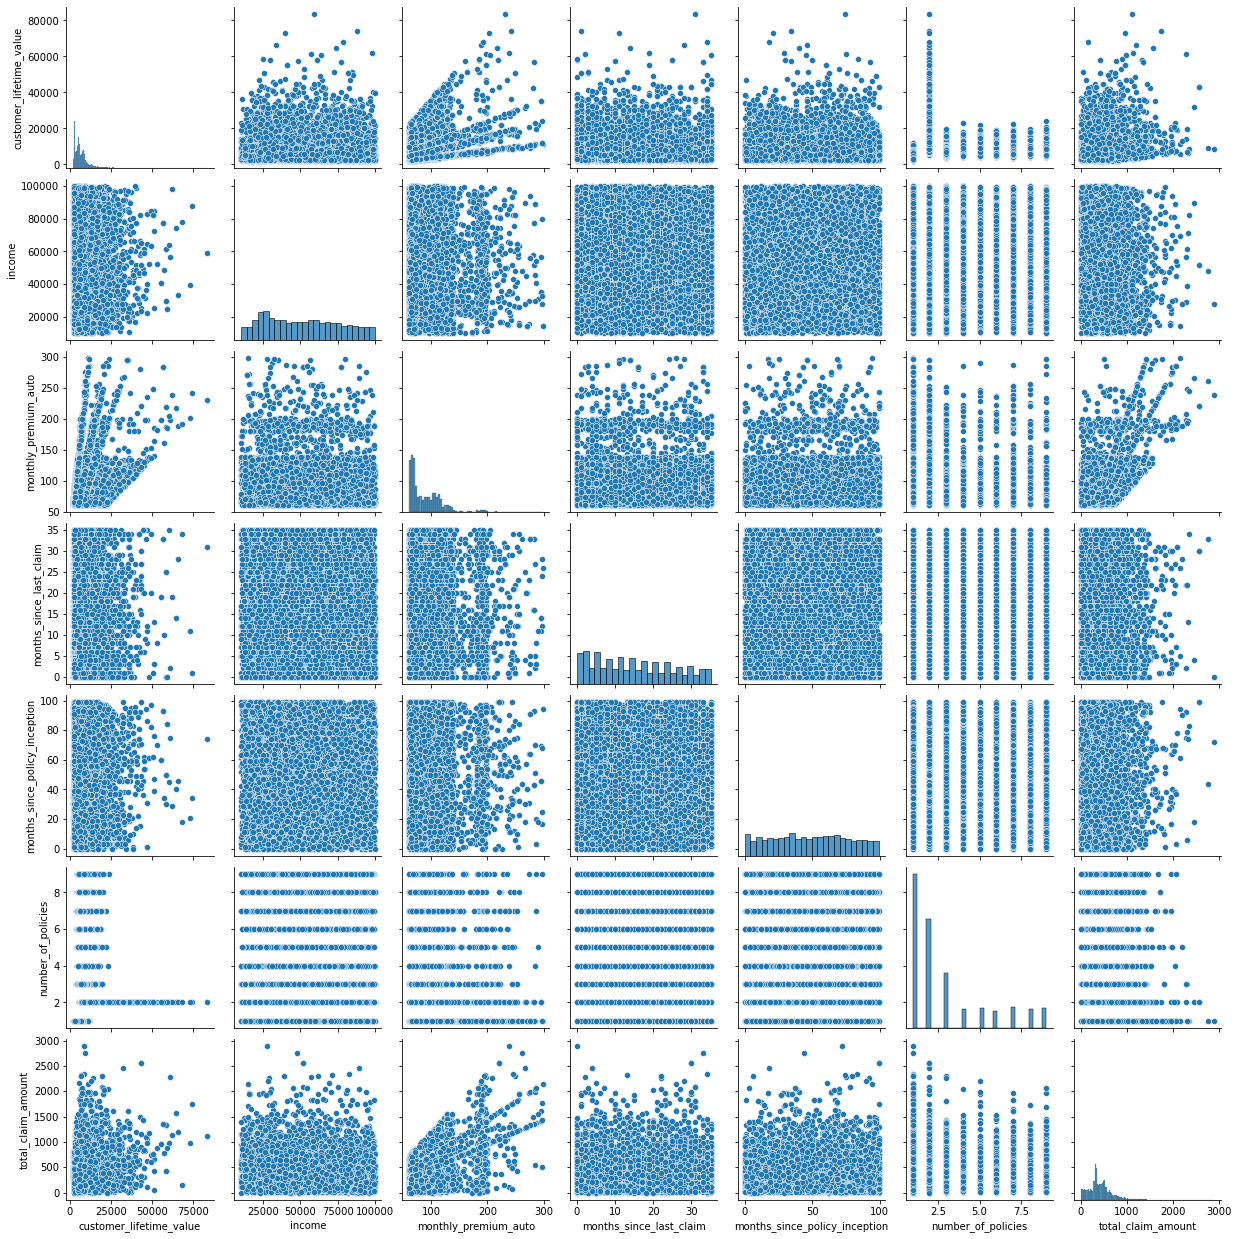

In [170]:
sns.pairplot(ca_numerical)

   <mark> We notice a correlation between the customer lifetime value and the monthly premium auto. Aswell as betwen monthly premium auto and total claim amount</mark>
    
- For the next step we'll show the correlation factor in a heatmap and exclude features where the corrrelation coeffizient is above 0.8 

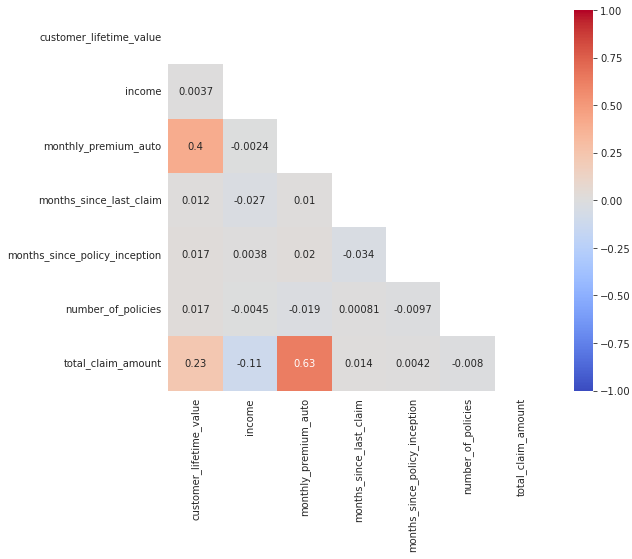

In [171]:
corr = ca_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [172]:
corr_matrix=ca_numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]


- <mark> **NO** feature is above 0.8 corrleation thats why we keep all of them</mark>
- <mark>in this case we use the limit as 0.8 as a rule of thumb </mark>
- <mark>in specific cases talk with the customer about any other instructions</mark>




# X-y split
- Y is the target variable, which is the total claim amount (also called dependent, explained)
- X are the independent features we will use to make pediction


In [173]:
ca_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_policies             10689 non-null  int64
 6   total_claim_amount             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB


In [174]:
X=ca_numerical.drop('total_claim_amount', axis=1) # dropping target form ca_numerical
y=ca_numerical.total_claim_amount # target feature as Y


In [175]:
X=X._get_numeric_data() #gets the rest of ca_numerical

<mark> LATER we gonna concat the numerical and categorical in a another model </mark>


--> X=pd.concat([X,categorical_cols],axis=1)

In [176]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809,48029,61,7,52,9
1,2228,92260,64,3,26,1
2,14947,22139,100,34,31,2
3,22332,49078,97,10,3,2
4,9025,23675,117,33,31,7
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7
10685,5259,61146,65,7,68,6
10686,23893,39837,201,11,63,2
10687,11971,64195,158,0,27,6


__Showing the distribution of each independent feature__

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>],
       [<AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>]],
      dtype=object)

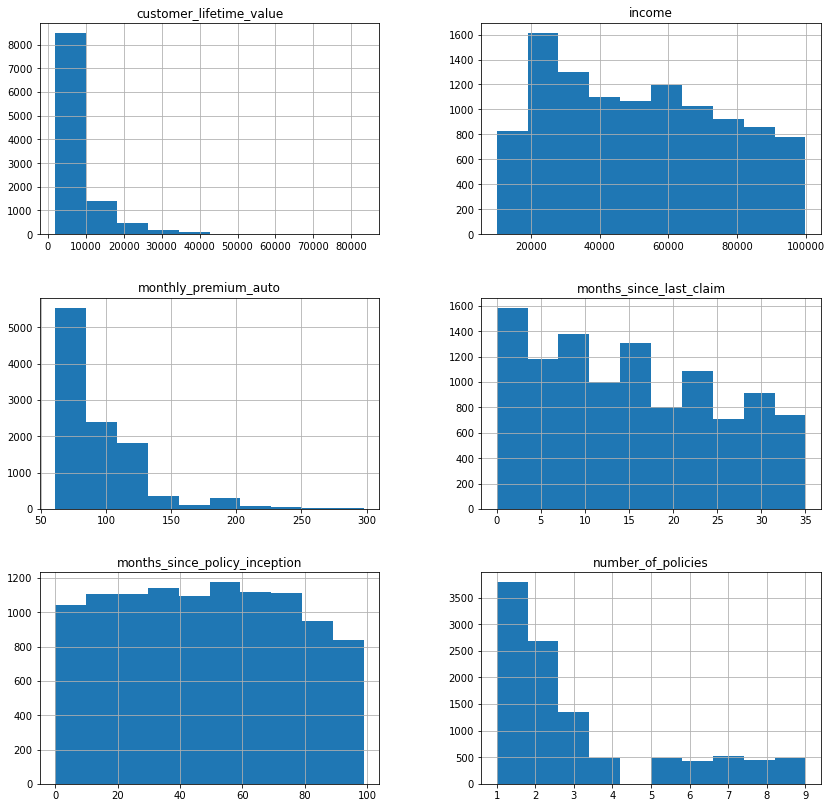

In [177]:
X.hist(figsize=(14,14))

# Train-test split

- test_size = 0.3 
    - is the percentage of data from the ca_numerical data frame we wish to use as test data for validating the model  

__Remember__ its supervised ML 

In [178]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [179]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [180]:
X_train.shape

(7482, 6)

# Standardize

In [181]:
X_test_scaled=std_scaler.transform(X_test) # Scale back the data to the original representation.


<mark>Standardize features by removing the mean and scaling to unit variance. </mark>
[Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [182]:
print(X_train_scaled) # 70% data from ca_numerical we use to create the model. it trains with it.
print("--------")
print(X_test_scaled) # 30%  data from ca_numerical  we use to test the created model with

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733 -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198  0.84759702]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827 -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466 -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442 -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858 -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214  2.51614162]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633   -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339 -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489 -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442  0.43046087]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009 -0.82094758]]


# Modeling using Scikit Learn 

## Fitting 
- <mark>y= a (alpha) + bx (beta)</mark>
- we have 6 independent/Input features therefore the model should give us 6 betas back 

In [183]:
model= LinearRegression()#model
model.fit(X_train_scaled, y_train) #model train

LinearRegression()

<mark>giving back the (b1,b2,b3,b4,b5,b6)</mark>
- b1 = -6.66315266
- b2 = -33.13187424
- b3 = 187.82156671
- b4 = 1.91008198,
- b5 = -0.91279703
- b6 = -2.31317812

In [184]:
model.coef_

array([ -6.66315266, -33.13187424, 187.82156671,   1.91008198,
        -0.91279703,  -2.31317812])

<mark>giving back the alpha </mark>

- a = 433.0597433841219

In [185]:
model.intercept_ 

433.0597433841219

In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_policies             10689 non-null  int64
dtypes: int64(6)
memory usage: 501.2 KB



    y= 433.0597433841219+ (-6.66315266 * customer_lifetime_value) + (-33.13187424 * income) + (187.82156671* monthly_premium_auto) + (1.91008198* months_since_last_claim) + (-0.91279703 * months_since_policy_inception) + (-2.31317812 * number_of_policies)

## Model Prediction/ Testing

In [187]:
y_pred_test=model.predict(X_test_scaled) #model prediction with the 30% observations we include in the train-test-split

y_pred_train = model.predict (X_train_scaled) # prediction of y with the 70% of the train data 


In [188]:
y_pred_test


array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

In [189]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## Prediction with new data 

    We use following new customer as an example 
- customer_lifetime_value = __400__
- income = **80.000**
- monthly_premium_auto = **150** 
- months_since_last_claim =**3**
- months_since_policy_inception = **12**
- number_of_policies = **4**

In [190]:
np.array(np.array(new_data).reshape(-1,6)).shape


(1, 6)

In [191]:
new_data=[400,80000,150,3,12,4]
new_data_scaled= std_scaler.transform(np.array(new_data).reshape(-1,6)) # using std_scaler.transform because we need the same means, and std. deviation from the X_train 




/Users/elisabethoeljeklaus/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [192]:
model.predict(new_data_scaled) # output is the  prediction of the value of the total claim amount in $

array([709.04535102])

#  Model Evaluation

- Evaluating the Model (Validation test - train)

In [193]:
y_test # original y to the 30% test data

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [194]:
y_pred_test # predicted y to the 30% test data

array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

- Make a scatter plot of the predicted values against the real values. In a perfect model, the predicted values match the real values, therefore you should see an straight line.

- Plot the distribution of the residuals (real_value - predicted_value) they should look normally distributed. Deviations from normality means average over/under estimation.

In [195]:
result=pd.DataFrame({"y_test":y_test,"y_pred_test":y_pred_test})

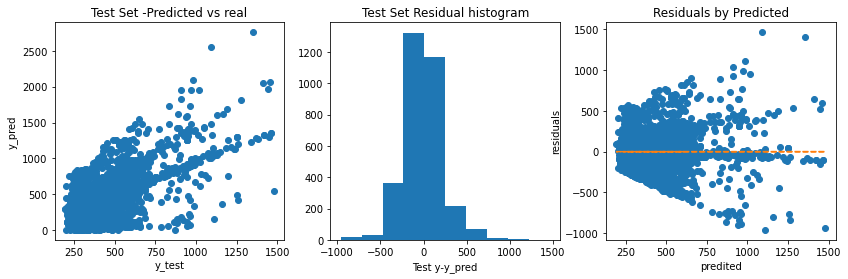

In [196]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


ax[2].plot(y_pred_test,y_test - y_pred_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred_test', ylabel='y_test'>

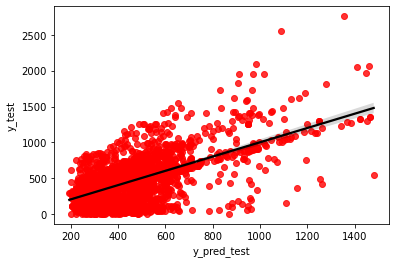

In [197]:
sns.regplot(x="y_pred_test", y="y_test", data=result, scatter_kws={"color":"red"}, line_kws={"color":"black"})

<mark> We can see that there is a heteroscedasticity for the pedicted residuals </mark>

## Error metrics 

- **MSE** Mittlere quadratische Abweichung - Mean Square Error
- **MAE** Mittlerer absolute Abweichung - Mean Absolute Error 
- **RMSE** Mittleres Abweichungsquadrat - Root Mean Square Error

In [198]:
print(mse(y_test,y_pred_test))


49403.17881141506


The squared distance of the observations (the entries of the dataset) to the predictions on a regression is 49403 $ 

In [199]:
print(mae(y_test,y_pred_test)) 

151.97245752690142


The absolute distance of the observations (the entries of the dataset) to the predictions on a regression is 151$ 

In [200]:
print(mse(y_test, y_pred_test, squared=False))

222.26825866824768


The distance of the observations (the entries of the 
dataset) to the predictions on a regression is 222 $ 

In [201]:
mse (y_train,y_pred_train)

51010.87789203499

##  R<sup>2</sup> to explain the quality of the model 
    we compare the R2 from the train and the test data --> there are 2 different sickit functions to find R^2
      

<mark> To IMPROVE the R2 (increase the KPI) there are a lot of diffrent approaches: </mark>
1. remove outliers and different 
2. [klick here for more](https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604)


    


Der Adjusted R-Squared-Wert ist immer etwas niedriger als der Multiple R-Squared-Wert, da er die Modellkomplexität (die Anzahl von Variablen) im Verhältnis zu den Daten widerspiegelt.Daher ist der Adjusted R-Squared-Wert ein etwas genaueres Maß für die Modell-Performance.

__A)__   <mark>r<sup>2</sup>_score() </mark>

In [202]:
R2=r2_score(y_test,y_pred_test)
R2


0.40774244022467265

In [203]:
R22=r2_score(y_train,y_pred_train)
R22

0.4102828450110748

__2)__ <mark>model.score() </mark>

In [204]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [205]:
R2_test


0.40774244022467265

In [206]:
R2_train

0.4102828450110748

## Adjusted  R<sup>2</sup>

 - Provides a measurement of the “explanatory” power of a model taking into account the number of independent features used by the model.
- Only increases if the inclusion of a new feature improves the model’s performance.


In [207]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40663195730009394

# Feature Importance

In [208]:
# getting number of independent features  /parameters of linear funcciton
X_test.shape[1]

6

In [209]:
features_importances = pd.DataFrame(data = {"Attribute": X_train.columns, "Importance": abs(model.coef_)})
features_importances = features_importances.sort_values(by="Importance", ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.821567
1,income,33.131874
0,customer_lifetime_value,6.663153
5,number_of_policies,2.313178
3,months_since_last_claim,1.910082
4,months_since_policy_inception,0.912797


    Therefore we can conclude about the relationships between x1 and x2 , that the strength of the effect / the magnitude of the effect x1 on y is greater than x2 on y.

# Transfer to csv. 

with  `to_csv`



In [211]:
ca_numerical.to_csv("data/ca_numerical_auto_insurance.csv", index=False)
categorical_features.to_csv("data/categorical_features_auto_insurance.csv", index = False)